In [1]:
import autolens as al
import autolens.plot as aplt
import cv2
import numpy as np
import matplotlib.pyplot as plt

import os
import time
import datetime

In [2]:
WIDTH = 300
HEIGHT = 300
FPS = 10
LENGTH = FPS * 2

init_pos = -1.0
final_pos = 1.0

SIM_NO = 0

while 1:
    file_name = 'sims_lensing' + str(SIM_NO) + '.mp4'
    if not os.path.exists(file_name):
        break
    SIM_NO += 1
print(SIM_NO)

3


In [3]:
forcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('sims_lensing' + str(SIM_NO) + '.mp4', forcc, FPS, (WIDTH, HEIGHT))

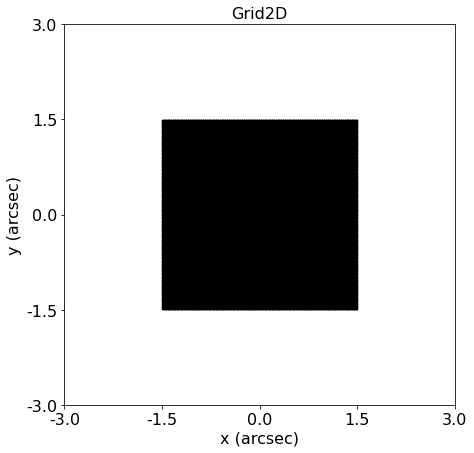

In [4]:
grid = al.Grid2D.uniform(shape_native=(300,300), pixel_scales=0.01)
aplt.Grid2DPlotter(grid=grid).figure_2d()


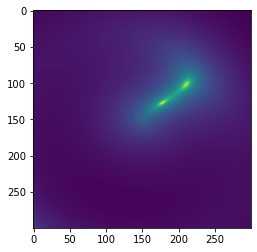

<class 'numpy.ndarray'> uint8


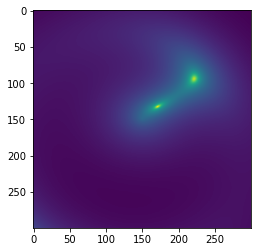

<class 'numpy.ndarray'> uint8


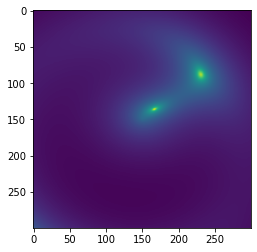

<class 'numpy.ndarray'> uint8


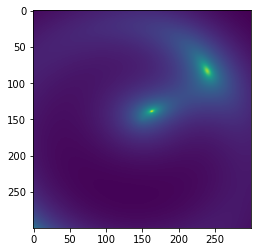

<class 'numpy.ndarray'> uint8


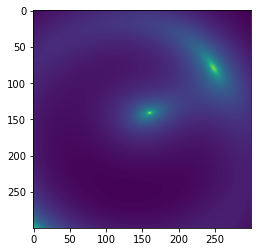

<class 'numpy.ndarray'> uint8
DONE!


In [5]:
pos = init_pos
delta_pos = (final_pos - init_pos) / LENGTH
tic = time.time()
frame = np.zeros((HEIGHT, WIDTH,3), dtype = np.uint8)
for iter in range(5):
    pos += delta_pos
    source = al.Galaxy(
        redshift=1.0,
        buldge = al.lp.Chameleon(
            centre=(pos, pos),
            ell_comps=(0,0.11),
            intensity=1,
            core_radius_0=0.05,
            core_radius_1=0.25
        ),
        disk = al.lp.Sersic(
            centre=(pos, pos),
            ell_comps=(0,0.11),
            effective_radius=1,
            sersic_index=1,
            intensity=1.5,
        )
    )
    
    mp_2 = al.mp.Exponential(
        centre=(0,0), 
        ell_comps=(0,.1), 
        intensity = 1*1.2, 
        effective_radius=0.75, 
        mass_to_light_ratio=1.2
    )
    lp_2 = al.lp.Exponential(
        centre=(0,0), 
        ell_comps=(0,.1), 
        intensity = 1, 
        effective_radius=0.75,
    )

    galaxy_m = al.Galaxy(
        redshift = 0.5,
        light_1 = lp_2,
        mass_1 = mp_2
    )

    tracer = al.Tracer.from_galaxies(galaxies=[source, galaxy_m])
    traced_image = tracer.image_2d_from(grid=grid)

    # print(f'\r{(iter+1)*1000//LENGTH/10}%\t|\tTime remaining: {datetime.timedelta(seconds=(LENGTH-iter)//((iter+1)/(time.time() - tic + 1)))}', end='')

    f = traced_image.native
    f = np.array(f)
    f = f * (255 /np.max(f))

    f = np.array(f, dtype = np.uint8)

    # print(np.max(f), np.min(f))

    frame[:,:,0] = f

    # plt.imshow(f)
    # plt.show()
    # print(type(frame), frame.dtype)

    out.write(frame)

print("DONE!")

TypeError: Image data of dtype object cannot be converted to float

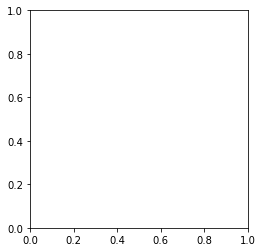

In [7]:
plt.imshow(source)

In [ ]:
np.linalg.svd()